In [1]:
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)

import fly_plot_lib.flymath as flymath
import pandas
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import copy
import figurefirst as fifi

1.5.1
recommended version: 1.1.1 or greater


/home/caveman/.local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def get_frame_where_food_found(near_food):
    chunks, breaks = flymath.get_continuous_chunks(near_food)
    for chunk in chunks:
        if len(chunk) > 12: # > 0.2 seconds:
            return chunk[0]
    return None

def get_time_to_find_food(fly_number, arena, flies):
    food_x = arena.query('fly=='+str(fly_number))['food_center_x'].values[0]
    food_y = arena.query('fly=='+str(fly_number))['food_center_y'].values[0]

    fly = flies.query('fly=='+str(fly_number))
    fly['distance_to_food'] = np.sqrt((fly.position_x-food_x)**2 + (fly.position_y-food_y)**2)
    near_food = np.where(fly.distance_to_food<2.5)[0]
    
    if len(near_food) > 0:
        frame_where_food_found = get_frame_where_food_found(near_food)
        if frame_where_food_found is not None:
            time_when_food_found = fly.time.iloc[frame_where_food_found]
            
            dt = np.median(np.diff(fly.time))
            
            speed = np.sqrt(fly.velocity_x**2 + fly.velocity_y**2)
            distance = np.cumsum(speed*dt)
            distance_when_food_found = distance.iloc[frame_where_food_found]
            
            return time_when_food_found, distance_when_food_found
    return None, None

# Dark

In [10]:
arena = pandas.read_csv('irenesdata/dataset_03_largeArena_dark_arena.csv')
flies = pandas.read_csv('irenesdata/dataset_03_largeArena_dark_flies.csv')

times_when_food_found = []
distances_when_food_found = []

for fly_number in flies.fly.unique():
    t, d = get_time_to_find_food(fly_number, arena, flies)
    if t is not None:
        times_when_food_found.append(t)
        distances_when_food_found.append(d)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [11]:
num_bins = 30
cdf_bs = []
for i in range(10000):
    vals = np.random.choice(distances_when_food_found, len(distances_when_food_found), replace=True)
    counts, bin_edges = np.histogram(vals, bins=num_bins, normed=True)
    cdf = np.cumsum(counts)
    cdf /= np.max(cdf)
    cdf_bs.append(cdf)
    
cdf_bs = np.vstack(cdf_bs)
cdf_bs = np.sort(cdf_bs, axis=0)
dark_bin_edges = copy.copy(bin_edges)
dark_low = copy.copy(cdf_bs[int(0.025*cdf_bs.shape[0])])
dark_high = copy.copy(cdf_bs[int(0.975*cdf_bs.shape[0])])

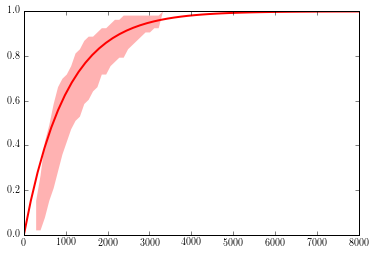

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.fill_between(dark_bin_edges[1:], dark_low, dark_high, edgecolor='none', facecolor='red', alpha=0.3)

search_distances = np.linspace(0, 8000)
pfoodstep = 1000
cdf_model = scipy.stats.expon.cdf(search_distances, scale=pfoodstep)
plt.plot(search_distances, cdf_model, color='red', linewidth=2)

# Light

In [6]:
arena = pandas.read_csv('irenesdata/dataset_01_largeArena_yeast_arena.csv')
flies = pandas.read_csv('irenesdata/dataset_01_largeArena_yeast_flies.csv')

times_when_food_found = []
distances_when_food_found = []

for fly_number in flies.fly.unique():
    t, d = get_time_to_find_food(fly_number, arena, flies)
    if t is not None:
        times_when_food_found.append(t)
        distances_when_food_found.append(d)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [7]:
num_bins = 30
cdf_bs = []
for i in range(10000):
    vals = np.random.choice(distances_when_food_found, len(distances_when_food_found), replace=True)
    counts, bin_edges = np.histogram(vals, bins=num_bins, normed=True)
    cdf = np.cumsum(counts)
    cdf /= np.max(cdf)
    cdf_bs.append(cdf)
    
cdf_bs = np.vstack(cdf_bs)
cdf_bs = np.sort(cdf_bs, axis=0)
yeast_bin_edges = copy.copy(bin_edges)
yeast_low = copy.copy(cdf_bs[int(0.025*cdf_bs.shape[0])])
yeast_high = copy.copy(cdf_bs[int(0.975*cdf_bs.shape[0])])

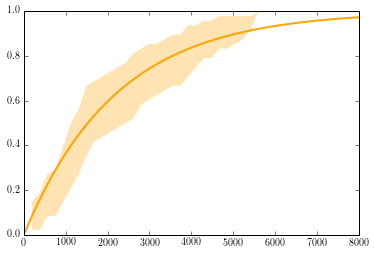

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.fill_between(yeast_bin_edges[1:], yeast_low, yeast_high, edgecolor='none', facecolor='orange', alpha=0.3)

search_distances = np.linspace(0, 8000)
pfoodstep = 2200
cdf_model = scipy.stats.expon.cdf(search_distances, scale=pfoodstep)
plt.plot(search_distances, cdf_model, color='orange', linewidth=2)

# FIFI

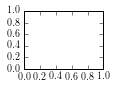

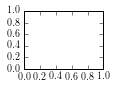

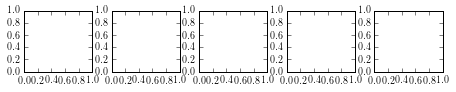

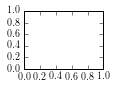

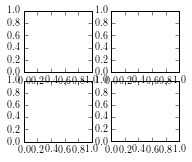

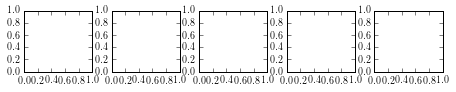

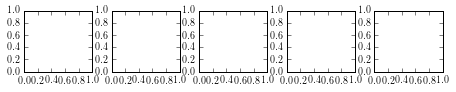

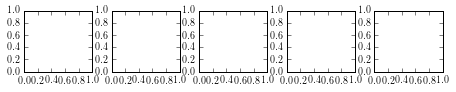

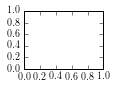

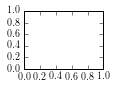

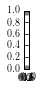

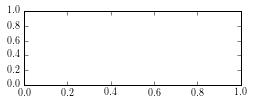

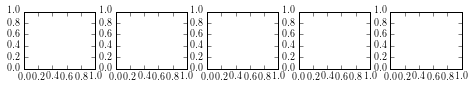

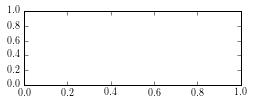

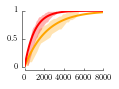

In [13]:
fififig = 'figures/foraging_fig_4_revision_v2.svg'
layout = fifi.svg_to_axes.FigureLayout(fififig, autogenlayers=True, 
                                       make_mplfigures=True, hide_layers=[])

ax = layout.axes[('irene', 'irene')]

# light yeast
ax.fill_between(yeast_bin_edges[1:], yeast_low, yeast_high, edgecolor='none', facecolor='orange', alpha=0.3)
search_distances = np.linspace(0, 8000)
pfoodstep = 2200
cdf_model = scipy.stats.expon.cdf(search_distances, scale=pfoodstep)
ax.plot(search_distances, cdf_model, color='orange', linewidth=2)

# dark yeast
ax.fill_between(dark_bin_edges[1:], dark_low, dark_high, edgecolor='none', facecolor='red', alpha=0.3)
search_distances = np.linspace(0, 8000)
pfoodstep = 1000
cdf_model = scipy.stats.expon.cdf(search_distances, scale=pfoodstep)
ax.plot(search_distances, cdf_model, color='red', linewidth=2)


fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 xticks=np.linspace(0, 8000, 5),
                                 yticks=[0., 0.5, 1],
                                 linewidth=0.5, tick_length=2.5, 
                                 spine_locations={'left': 2.5, 'bottom': 3.5})

ax.set_xticklabels(['$0$','$2000$','$4000$','$6000$','$8000$',])
ax.set_yticklabels(['$0$','$0.5$','$1$',])

fifi.mpl_functions.set_fontsize(ax.figure, 8)
layout.append_figure_to_layer(layout.figures['irene'], 'irene', cleartarget=True)
layout.write_svg(fififig)